In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from bs4 import BeautifulSoup


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#Importing Data

In [9]:
df=pd.read_csv('reviews.csv')

In [10]:
df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


#Text preprocessing

In [11]:
stop_words = set(stopwords.words("english"))
pattern = [r"https.[^ ]*",r"www.[^ ]*"]
class_map = {
    1: "Bad",
    2: "Bad",
    3: "Neutral",
    4: "Good",
    5: "Good"
}
columns=['Time_submitted','Total_thumbsup','Reply','Rating']
# List of Contractions to be removed
contractions = {
    "a'ight":"alright",
    "ain't":"are not",
    "amn't":"am not",
    "aren't":"are not",
    "can't":"cannot",
    "ca'nt":"cannot",
    "'cause": "because",
    "could've":"could have",
    "couldn't":"could not",
    "couldn't've":"could not have",
    "daren't":"dare not",
    "daresn't":"dare not",
    "dasn't":"dare not",
    "didn't":"did not",
    "doesn't":"does not",
    "does'nt":"does not",
    "don't":"do not",
    "everybody's":"everybody is",
    "everyone's":"everyone is",
    "giv'n":"given",
    "gonna":"going to",
    "gon't":"go not", 
    "gotta":"got to",
    "hadn't":"had not",
    "had've":"had have",
    "hasn't":"has not",
    "haven't":"have not",
    "have'nt":"have not",
    "he'd":"he had", 
    "he'll":"he will",
    "he's":"he is",
    "here's":"here is",
    "how'd":"how did",
    "how'll":"how will",
    "how're":"how are",
    "how's":"how is",
    "I'd":"I had",
    "I'd've":"I would have",
    "I'd'nt":"I would not",
    "I'd'nt've":"I would not have",
    "I'll":"I will",
    "I'm":"I am",
    "I've":"I have",
    "isn't":"is not",
    "it'd":"it would",
    "it'll":"it will",
    "it's":"it is",
    "let's":"let us",
    "ma'am":"madam",
    "mayn't":"may not",
    "may've":"may have",
    "mightn't":"might not",
    "might've":"might have",
    "mustn't":"must not",
    "mustn't've":"must not have",
    "must've":"must have",
    "needn't":"need not",
    "needn't've":"need not have",
    "o'clock":"of the clock",
    "oughtn't":"ought not",
    "oughtn't've":"ought not have",
    "shan't":"shall not",
    "she'd":"she would",
    "she'll":"she will",
    "she's":"she is",
    "should've":"should have",
    "shouldn't":"should not",
    "shouldn't've":"should not have",
    "somebody's":"somebody is",
    "someone's":"someone is",
    "something's":"something is",
    "so're":"so are",
    "so’s":"so is",
    "so’ve":"so have",
    "that'll":"that will",
    "that're":"that are",
    "that's":"that is",
    "that'd":"that would",
    "there'd":"there would",
    "there'll":"there will",
    "there're":"there are",
    "there's":"there is",
    "these're":"these are",
    "these've":"these have",
    "they'd":"they would",
    "they'll":"they will",
    "they're":"they are",
    "they've":"they have",
    "this's":"this is",
    "those're":"those are",
    "those've":"those have",
    "to've":"to have",
    "wasn't":"was not",
    "we'd":"we would",
    "we'd've":"we would have",
    "we'll":"we will",
    "we're":"we are",
    "we've":"we have",
    "weren't":"were not",
    "what'd":"what did",
    "what'll":"what will",
    "what're":"what are",
    "what's":"what is",
    "what've":"what have",
    "when's":"when is",
    "where'd":"where did",
    "where'll":"where will",
    "where're":"where are",
    "where's":"where is",
    "where've":"where have",
    "which'd":"which would",
    "which'll":"which will",
    "which're":"which are",
    "which's":"which is",
    "which've":"which have",
    "who'd":"who would",
    "who'd've":"who would have",
    "who'll":"who will",
    "who're":"who are",
    "who's":"who is",
    "who've":"who have",
    "why'd":"why did",
    "why're":"why are",
    "why's":"why is",
    "won't":"will not",
    "would've":"would have",
    "wouldn't":"would not",
    "wouldn't've":"would not have",
    "y'at":"you at",
    "yes’m":"yes madam",
    "you'd":"you would",
    "you'll":"you will",
    "you're":"you are",
    "you've":"you have"
}

In [12]:
df

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
...,...,...,...,...,...
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN
61590,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN
61591,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN
61592,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN


#Pipeline

In [13]:
def preprocess_data(df,column_name,stop_words,class_map,contractions):

    def lowercase_column(df, column_name):
        df[column_name] = df[column_name].str.lower()
        return df

    def remove_stopwords(df, column_name,stop_words):
        df[column_name] = df[column_name].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
        return df

        
    def expand_contractions(df, column_name, contractions):
      df[column_name] = df[column_name].apply(lambda x: ' '.join([contractions[word] if word in contractions else word for word in x.split()]))
      return df

    # def remove_html_tags(df, column_name):
    #     df[column_name] = df[column_name].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    #     return df

    def remove_regex_pattern(df, column_name):
        df[column_name] = df[column_name].replace(to_replace=[r"https.[^ ]*",r"www.[^ ]*"], value="", regex=True)
        return df

    def remove_special_characters(df, column_name):
        df[column_name] = df[column_name].str.replace('[^\w\s]', '', regex=True)
        return df
        
    def map_class(df, column_name, class_map):
        df['Sentiments'] = df[column_name].map(class_map)
        return df

    lowercase_column(df,'Review')
    map_class(df, 'Rating', class_map)
    remove_regex_pattern(df, 'Review')
    remove_stopwords(df, 'Review',stop_words)
    expand_contractions(df, 'Review',contractions)
    remove_special_characters(df, 'Review')
    
    
    return df


In [14]:
dfp=preprocess_data(df,'Review',stop_words,class_map,contractions)

data =dfp.drop(columns,1)

<ipython-input-14-2d957102abc5>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data =dfp.drop(columns,1)


In [15]:
data.head()

,Review,Sentiments
0,great music service audio high quality app eas...,Good
1,please ignore previous negative rating app sup...,Good
2,popup get best spotify experience android 12 a...,Good
3,really buggy terrible use recently,Bad
4,dear spotify get songs put playlist shuffle play,Bad


##Tokenisation

In [16]:
def tokenize_column(df, column_name):
    train_tokens = df[column_name].apply(lambda x : word_tokenize(x))
    return train_tokens

X=tokenize_column(data, 'Review')


In [17]:
X

0        [great, music, service, audio, high, quality, ...
1        [please, ignore, previous, negative, rating, a...
2        [popup, get, best, spotify, experience, androi...
3                 [really, buggy, terrible, use, recently]
4        [dear, spotify, get, songs, put, playlist, shu...
                               ...                        
61589    [even, though, communicated, lyrics, feature, ...
61590    [use, sooo, good, back, it, downloaded, free, ...
61591    [app, would, good, taking, device, on, start, ...
61592    [app, good, hard, navigate, let, play, song, c...
61593    [good, sometimes, doesnt, load, music, plays, ...
Name: Review, Length: 61594, dtype: object

#EDA

In [18]:
data['tokens'] = data['Review'].apply(nltk.word_tokenize)
tokens = [token for sublist in data['tokens'] for token in sublist]

fdist = FreqDist(tokens)

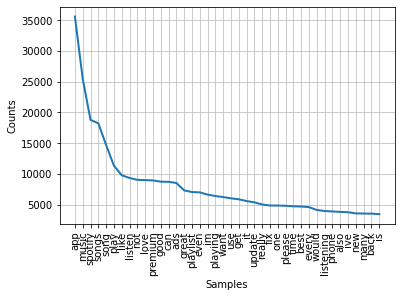

In [19]:
fdist.plot(40, cumulative=False)
plt.show()

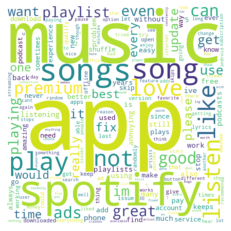

In [20]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=800,
                background_color='white',
                stopwords=stopwords,
                min_font_size=10).generate_from_frequencies(fdist)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Good
Bad


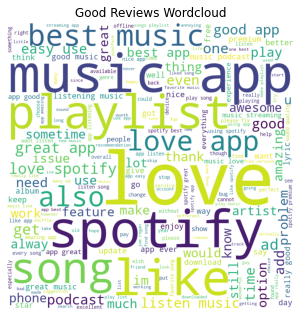

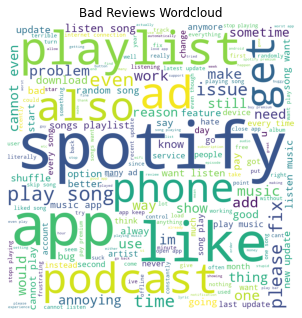

In [21]:
# create a subdataframe for good reviews
good_reviews = dfp[dfp['Sentiments'] == 'Good']

# create a subdataframe for bad reviews
bad_reviews = dfp[dfp['Sentiments'] == 'Bad']

# create a text variable for good reviews
good_text = " ".join(review for review in good_reviews.Review)

# create a text variable for bad reviews
bad_text = " ".join(review for review in bad_reviews.Review)

# create a wordcloud for good reviews
good_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(good_text)

# create a wordcloud for bad reviews
bad_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(bad_text)

# plot the good wordcloud
print("Good")
plt.figure(figsize = (4,4), facecolor = None) 
plt.imshow(good_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Good Reviews Wordcloud")

# plot the bad wordcloud
print("Bad")
plt.figure(figsize = (4,4), facecolor = None) 
plt.imshow(bad_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Bad Reviews Wordcloud")
plt.show()


In [34]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

# Fit the tokenizer on the text data
tokenizer = Tokenizer(num_words=1034495)
tokenizer.fit_on_texts(X)

# Convert the text data to numerical sequences
sequences = tokenizer.texts_to_sequences(X)

from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad the sequences to a maximum length
max_length =35
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')



In [35]:
padded_sequences.shape

(61594, 35)

In [36]:
Y=data.Sentiments

In [37]:
Y.shape

(61594,)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, Y, test_size=0.33, random_state=42)

In [39]:
X_train.max()

30063

In [40]:
print(X_train.shape)
print(X_test.shape)

(41267, 35)
(20327, 35)


In [41]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [42]:
X_train.shape[1]

35

In [43]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Activation, Dense
model= Sequential()
num_words=31000
model.add(Embedding(input_dim=num_words, output_dim=100,input_length=35, trainable=True))

model.add(LSTM(128, return_sequences=True, dropout=0.2))
model.add(LSTM(64, return_sequences=True, dropout=0.2))
model.add(LSTM(32, return_sequences=False, dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer ="adam", metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 35, 100)           3100000   
                                                                 
 lstm_3 (LSTM)               (None, 35, 128)           117248    
                                                                 
 lstm_4 (LSTM)               (None, 35, 64)            49408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 3,279,171
Trainable params: 3,279,171
Non-trainable params: 0
_________________________________________________________________


In [45]:
history=model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
645/645 [==============================] - 107s 158ms/step - loss: 0.6324 - accuracy: 0.7609 - val_loss: 0.5819 - val_accuracy: 0.7793
Epoch 2/5
645/645 [==============================] - 103s 160ms/step - loss: 0.5337 - accuracy: 0.8004 - val_loss: 0.5848 - val_accuracy: 0.7796
Epoch 3/5
645/645 [==============================] - 101s 157ms/step - loss: 0.4803 - accuracy: 0.8162 - val_loss: 0.6114 - val_accuracy: 0.7735
Epoch 4/5
645/645 [==============================] - 107s 165ms/step - loss: 0.4411 - accuracy: 0.8294 - val_loss: 0.6393 - val_accuracy: 0.7511
Epoch 5/5
645/645 [==============================] - 105s 164ms/step - loss: 0.3980 - accuracy: 0.8492 - val_loss: 0.6676 - val_accuracy: 0.7539


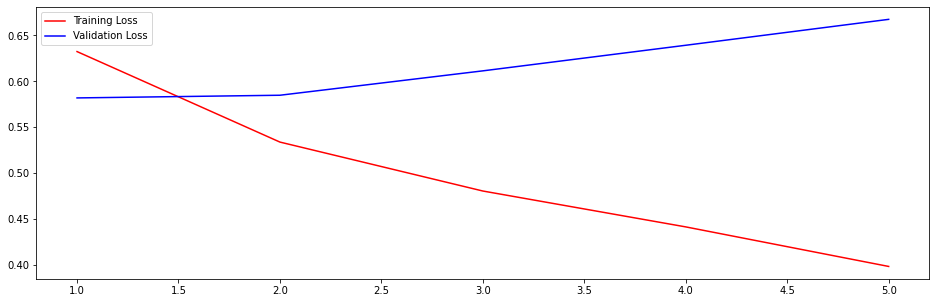

In [46]:
plt.figure(figsize=(16,5))

epochs=range(1, len(history.history['accuracy'])+1)

plt.plot(epochs, history.history['loss'], 'b', label='Training Loss', color="red") 
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation Loss')

plt.legend() 
plt.show()

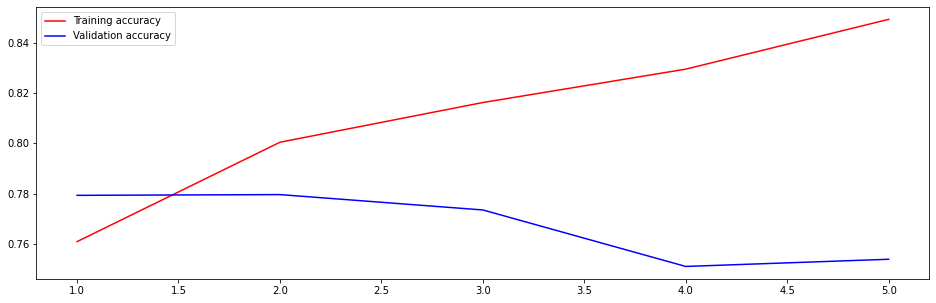

In [47]:
plt.figure(figsize=(16,5))

epochs=range(1, len(history.history['accuracy'])+1)

plt.plot(epochs, history.history['accuracy'], 'b', label='Training accuracy', color="red") 
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation accuracy')

plt.legend() 
plt.show()

In [48]:

model.save('model.h5')


In [66]:
from keras import models
#funtion to use saved model to predict sentiment
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.backend import manual_variable_initialization
manual_variable_initialization(False)
ps =PorterStemmer()
#load weights
mod = keras.models.load_model('model.h5')
mod.load_weights('model.h5')
mod

In [67]:
mod.evaluate(X_test,y_test)

636/636 [==============================] - 18s 27ms/step - loss: 0.6676 - accuracy: 0.7539


[0.6676033139228821, 0.7539233565330505]

In [68]:
def predict_sentiment(review):
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    # review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus = [review]
    X = tokenizer.texts_to_sequences(corpus)
    X = pad_sequences(X, maxlen=35)
    sentiment = mod.predict(X,batch_size=1,verbose = 2)
    if(np.argmax(sentiment) == 0):
        return("negative")
    elif (np.argmax(sentiment) == 1):
        return("neutral")
    elif (np.argmax(sentiment) == 2):
        return("positive")

In [69]:
sent= predict_sentiment("bad bad bad bad bad bad")
print(sent)

1/1 - 1s - 915ms/epoch - 915ms/step
neutral
